PHASE 3: EXPLORATORY DATA ANALYSIS

Start time: 2026-02-14 16:00:53

📂 Loading cleaned data...
✅ games_all: 26,523 games
✅ games_betting: 14,816 games (with complete odds)

📅 Betting data coverage:
   From: 2006-11-01
   To: 2018-06-08
   Seasons: 2006 to 2017

📊 We'll analyze 14,816 games with complete betting data!

📈 OVERALL SUMMARY STATISTICS

🏀 SCORING:
   Average home score: 102.1 ± 12.4
   Average away score: 99.1 ± 12.3
   Average total: 201.2
   Highest scoring: 318 points
   Lowest scoring: 134 points

🏠 HOME COURT ADVANTAGE:
   Average margin: 3.02 points (home favored)
   Standard deviation: 13.31
   Home win rate: 59.7%

💰 BETTING MARKET STATISTICS:
   Average spread: 3.16
   Average total line: 200.8
   Spread range: -22.5 to 22.0

🎯 BETTING OUTCOMES:
   Home covers spread: 63.7%
   Away covers spread: 36.3%
   Totals go OVER: 49.0%
   Totals go UNDER: 51.0%

   ⚠️  Home cover rate is 13.7% away from 50% - interesting!

📊 VISUALIZATION 1: Score Distributions


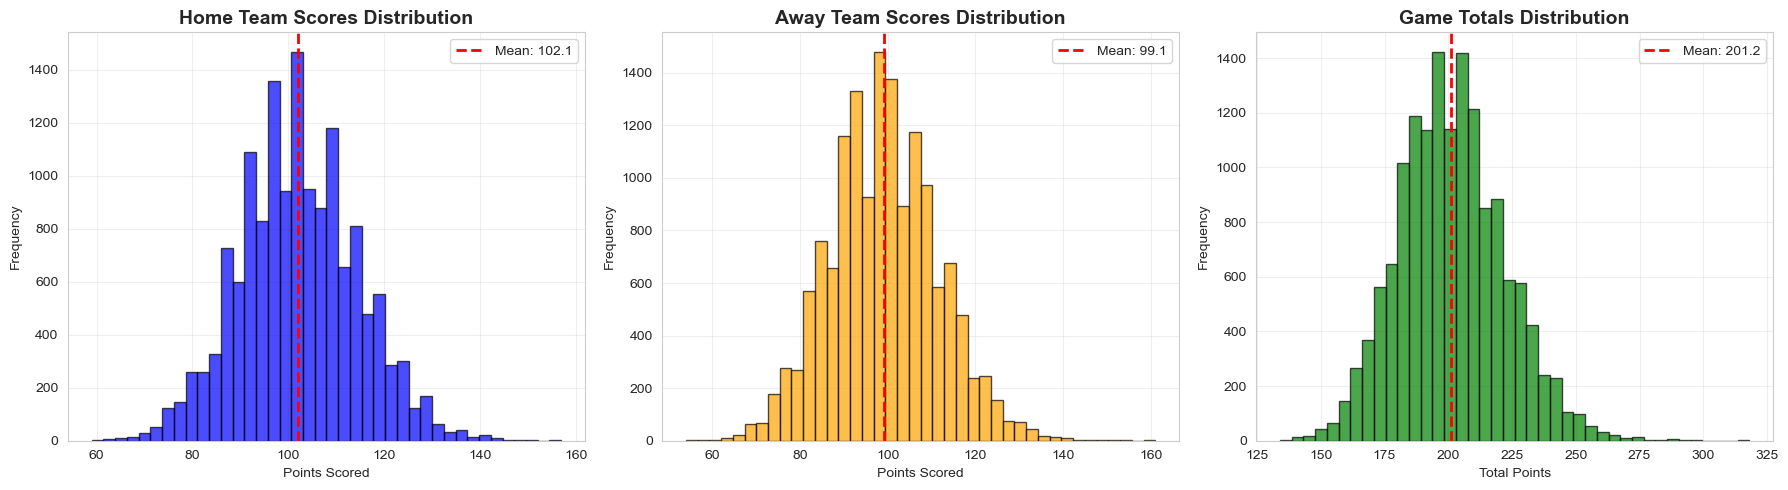

✅ Visualization saved: reports/01_score_distributions.png

💡 INSIGHTS:
   - Scores roughly follow normal distribution
   - Home teams score 3.0 more points on average
   - Most games have 180-220 total points

📊 VISUALIZATION 2: Home Court Advantage Trends


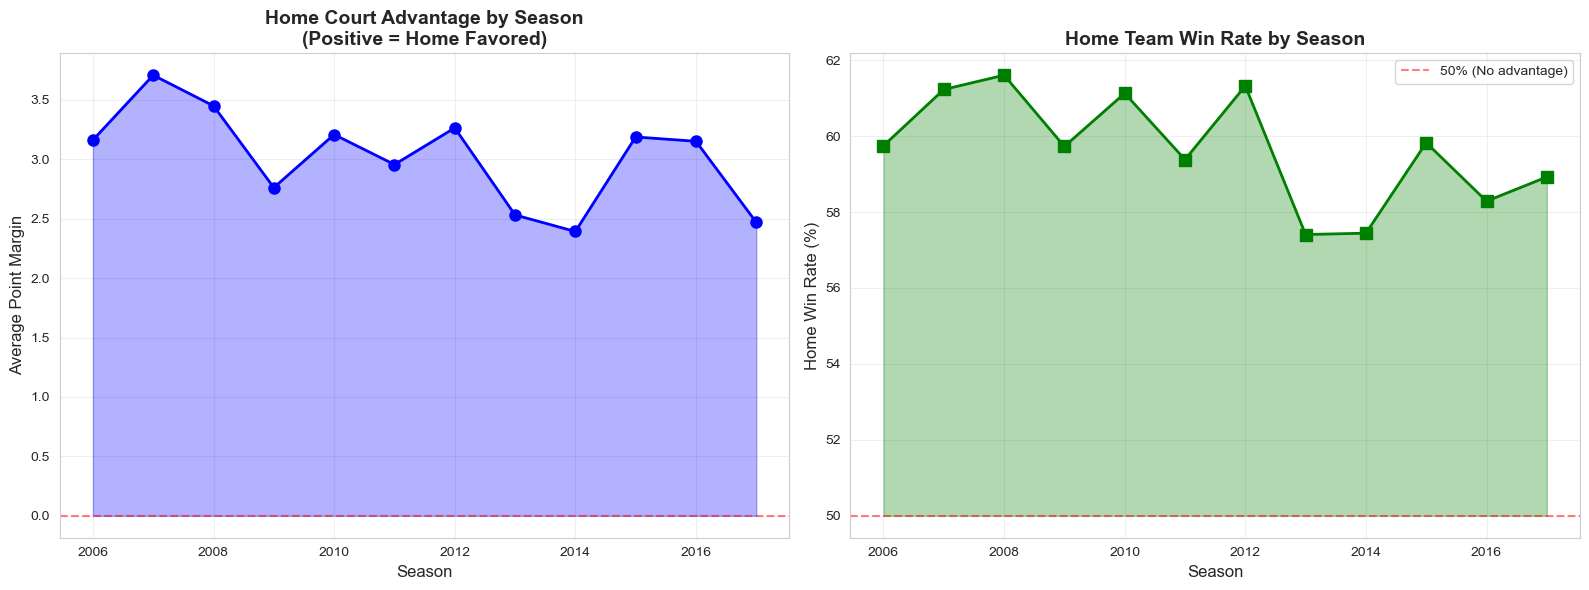

✅ Visualization saved: reports/02_home_court_trends.png

💡 INSIGHTS:
   - Home court advantage in 2006: 3.16 points
   - Home court advantage in 2017: 2.47 points
   - Trend: Decreasing by 0.69 points

📊 VISUALIZATION 3: Vegas Spread Accuracy


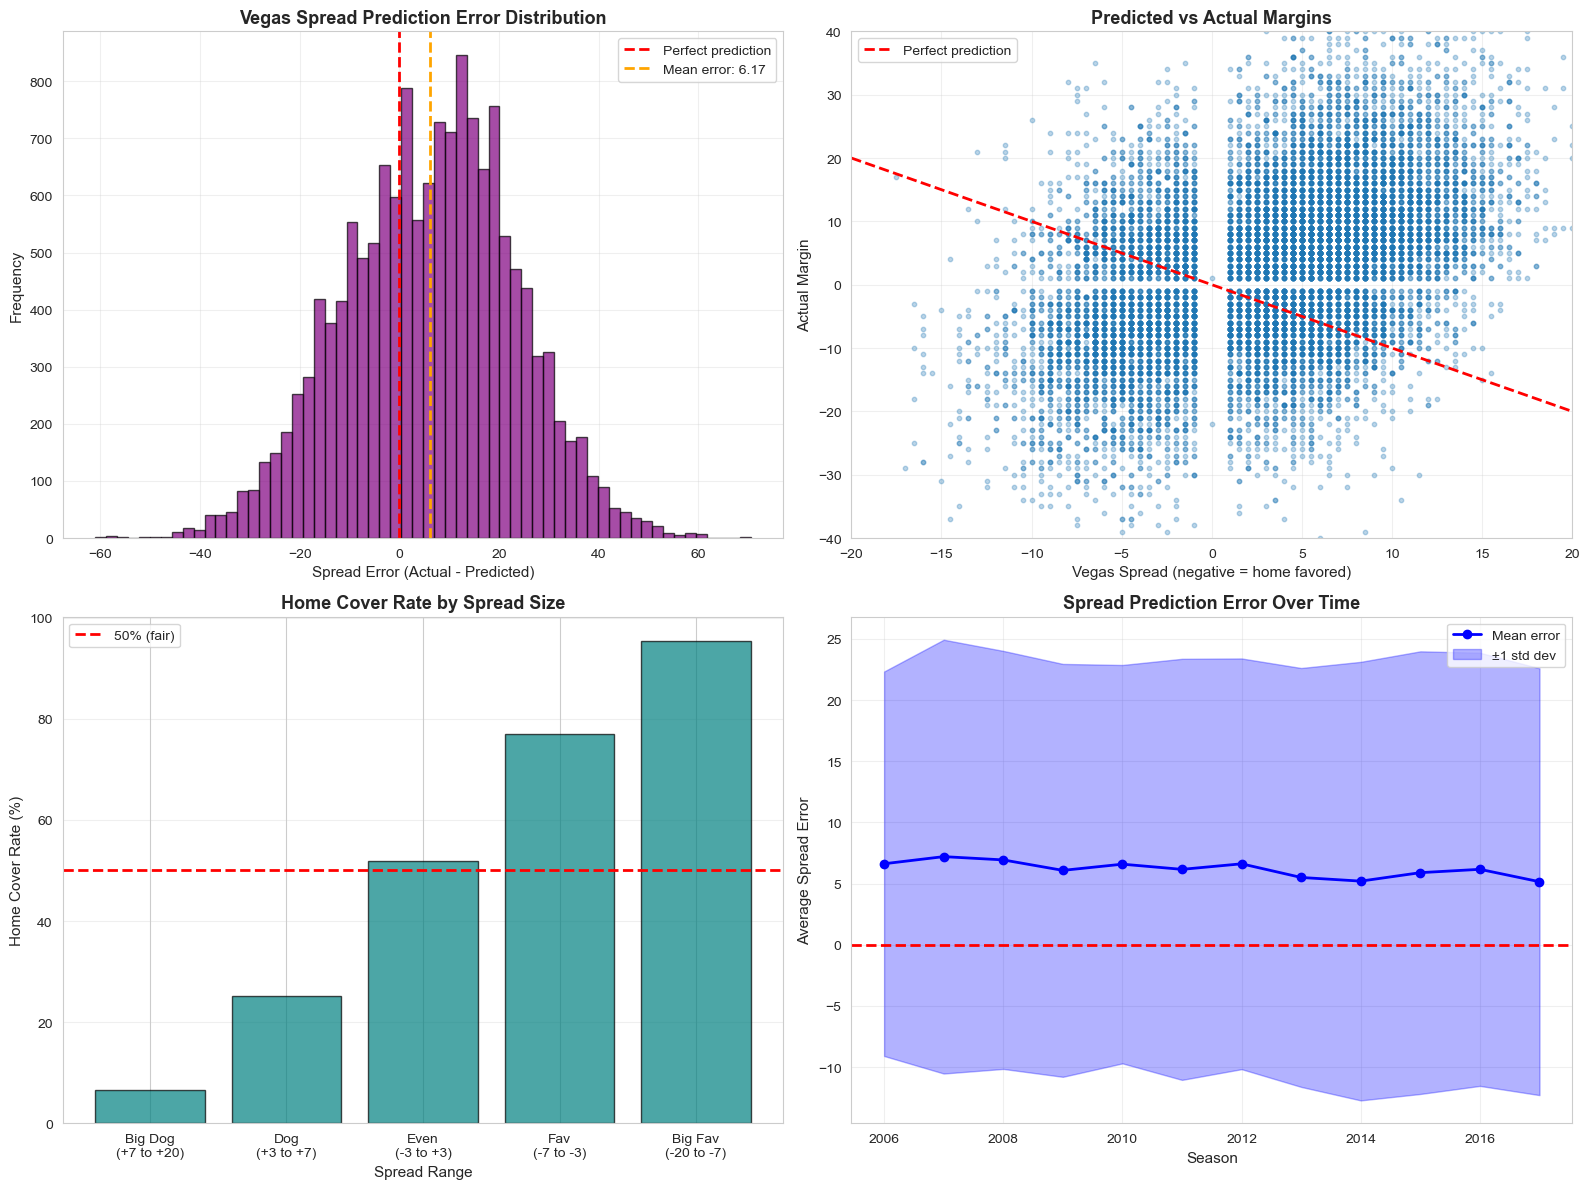

✅ Visualization saved: reports/03_spread_accuracy.png

💡 INSIGHTS:
   - Mean Absolute Error: 14.88 points
   - Root Mean Square Error: 18.27 points
   - Vegas is off by ~14.9 points on average
   - Spread error mean: 6.17 (close to 0 = unbiased)

📊 VISUALIZATION 4: Totals (Over/Under) Analysis


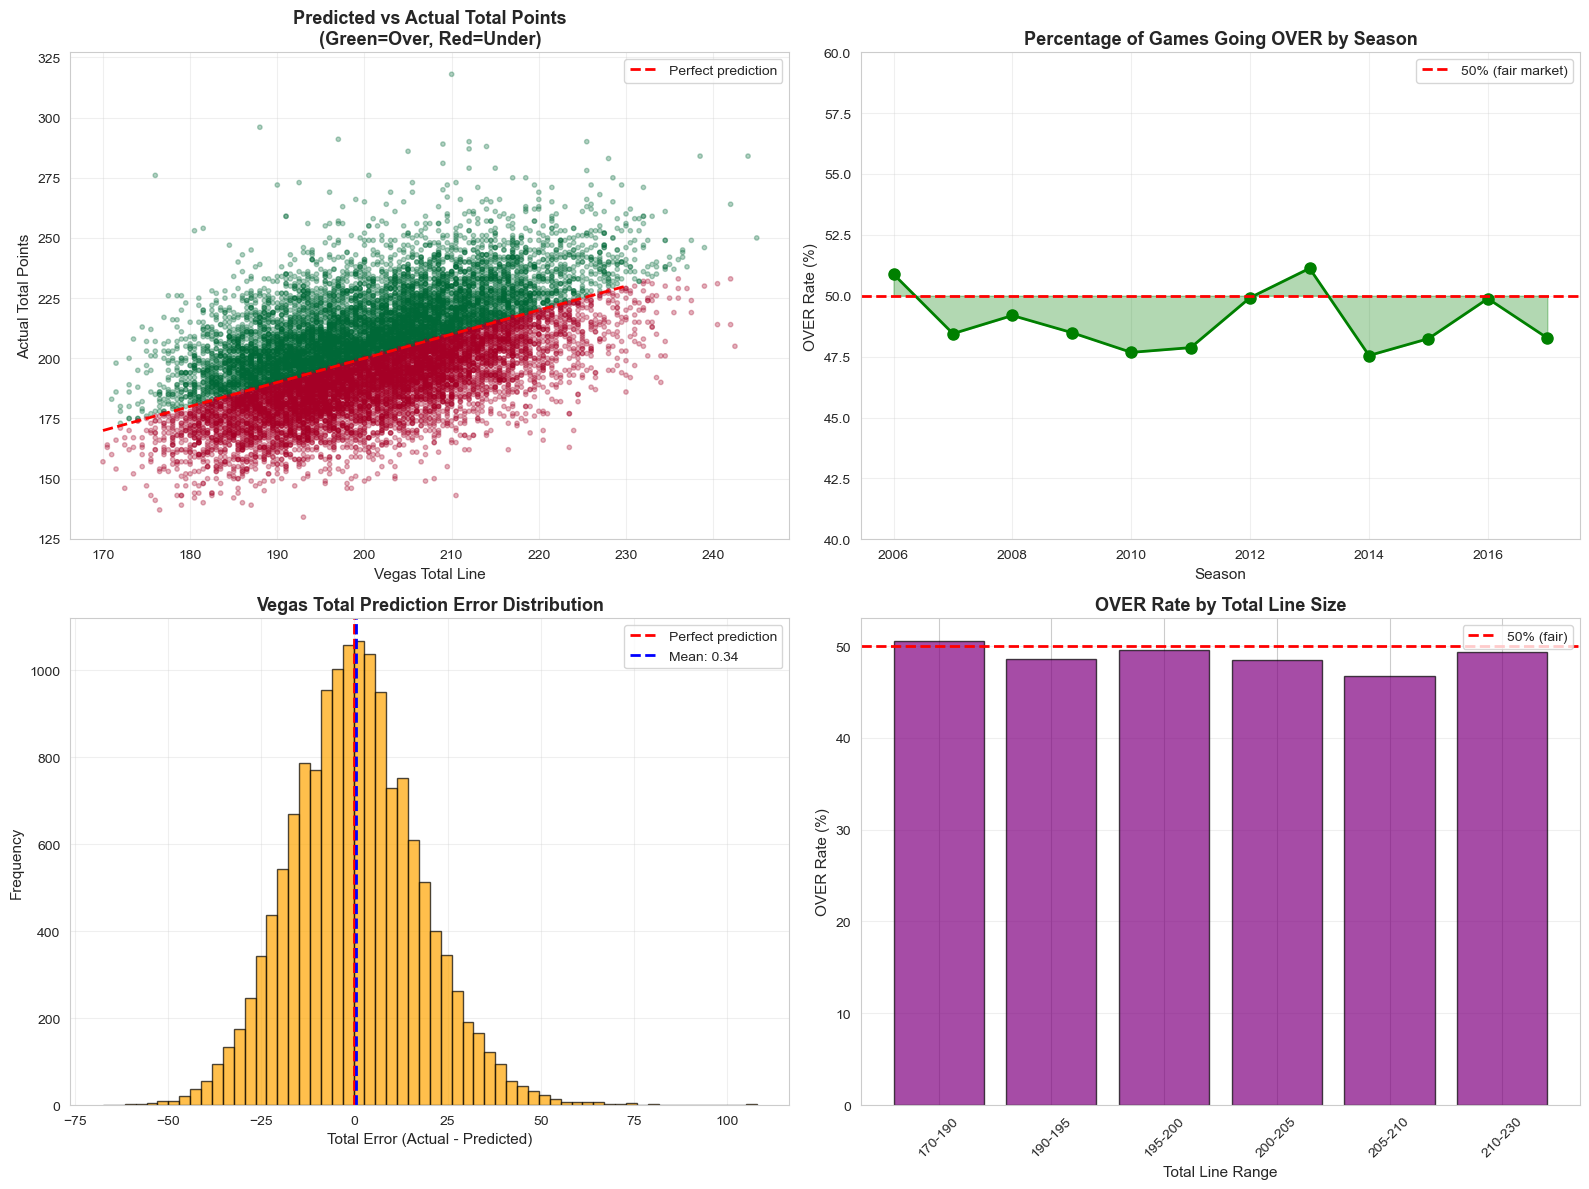

✅ Visualization saved: reports/04_totals_analysis.png

💡 INSIGHTS:
   - Vegas total off by ~13.7 points on average
   - OVER rate: 49.0% (should be ~50%)
   - Mean total error: 0.34 points

📊 VISUALIZATION 5: Day of Week Effects


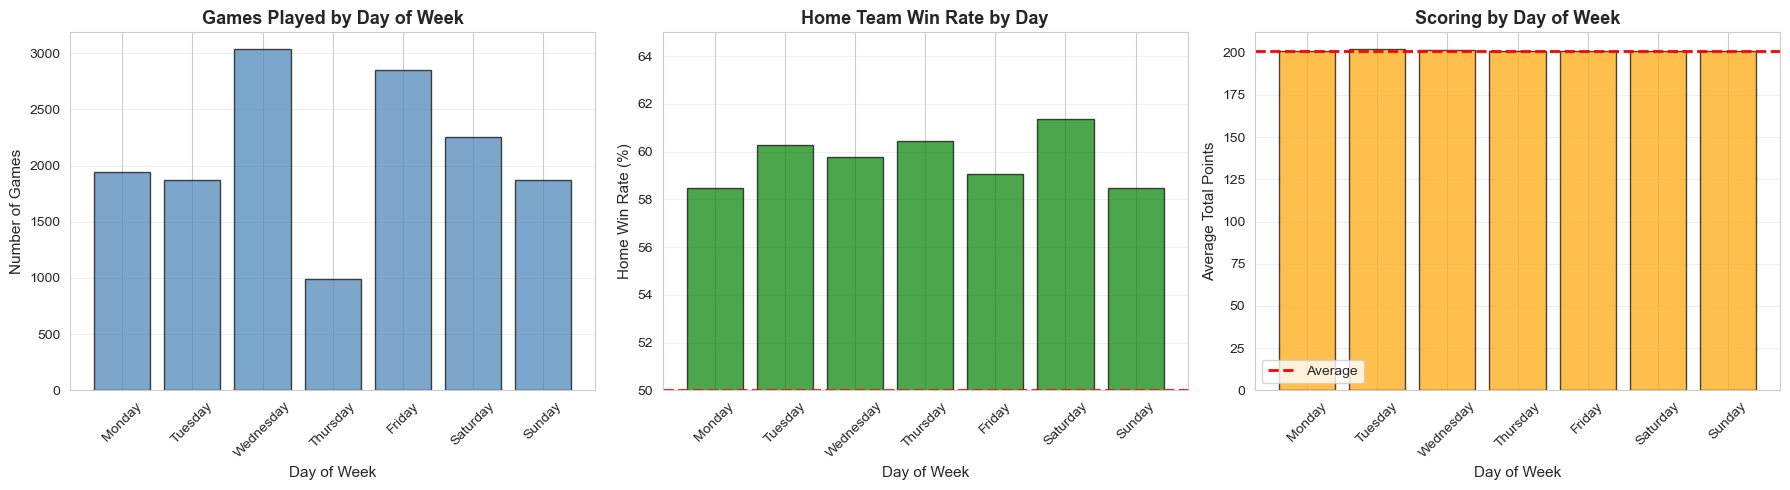

✅ Visualization saved: reports/05_day_of_week.png

💡 INSIGHTS:
   - Most games on: Wednesday
   - Fewest games on: Thursday

📊 VISUALIZATION 6: Monthly Patterns


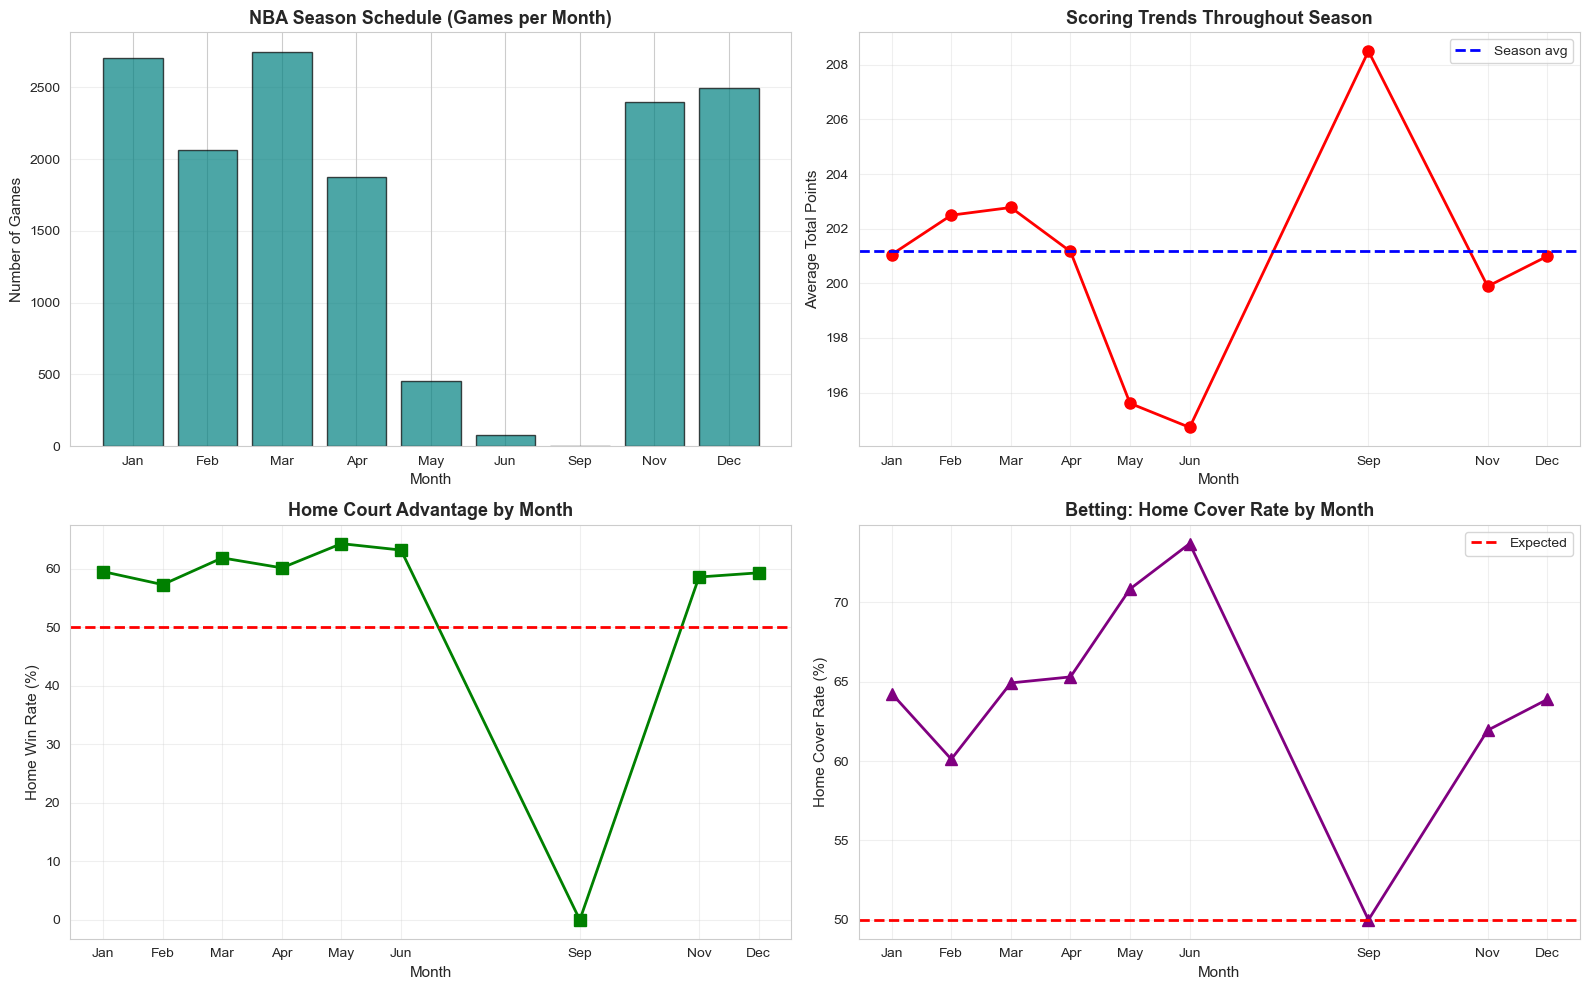

✅ Visualization saved: reports/06_monthly_patterns.png

💡 INSIGHTS:
   - NBA season runs October-June (playoffs in April-June)
   - Highest scoring month: Sep (208.5 pts)

📊 VISUALIZATION 7: Correlation Matrix


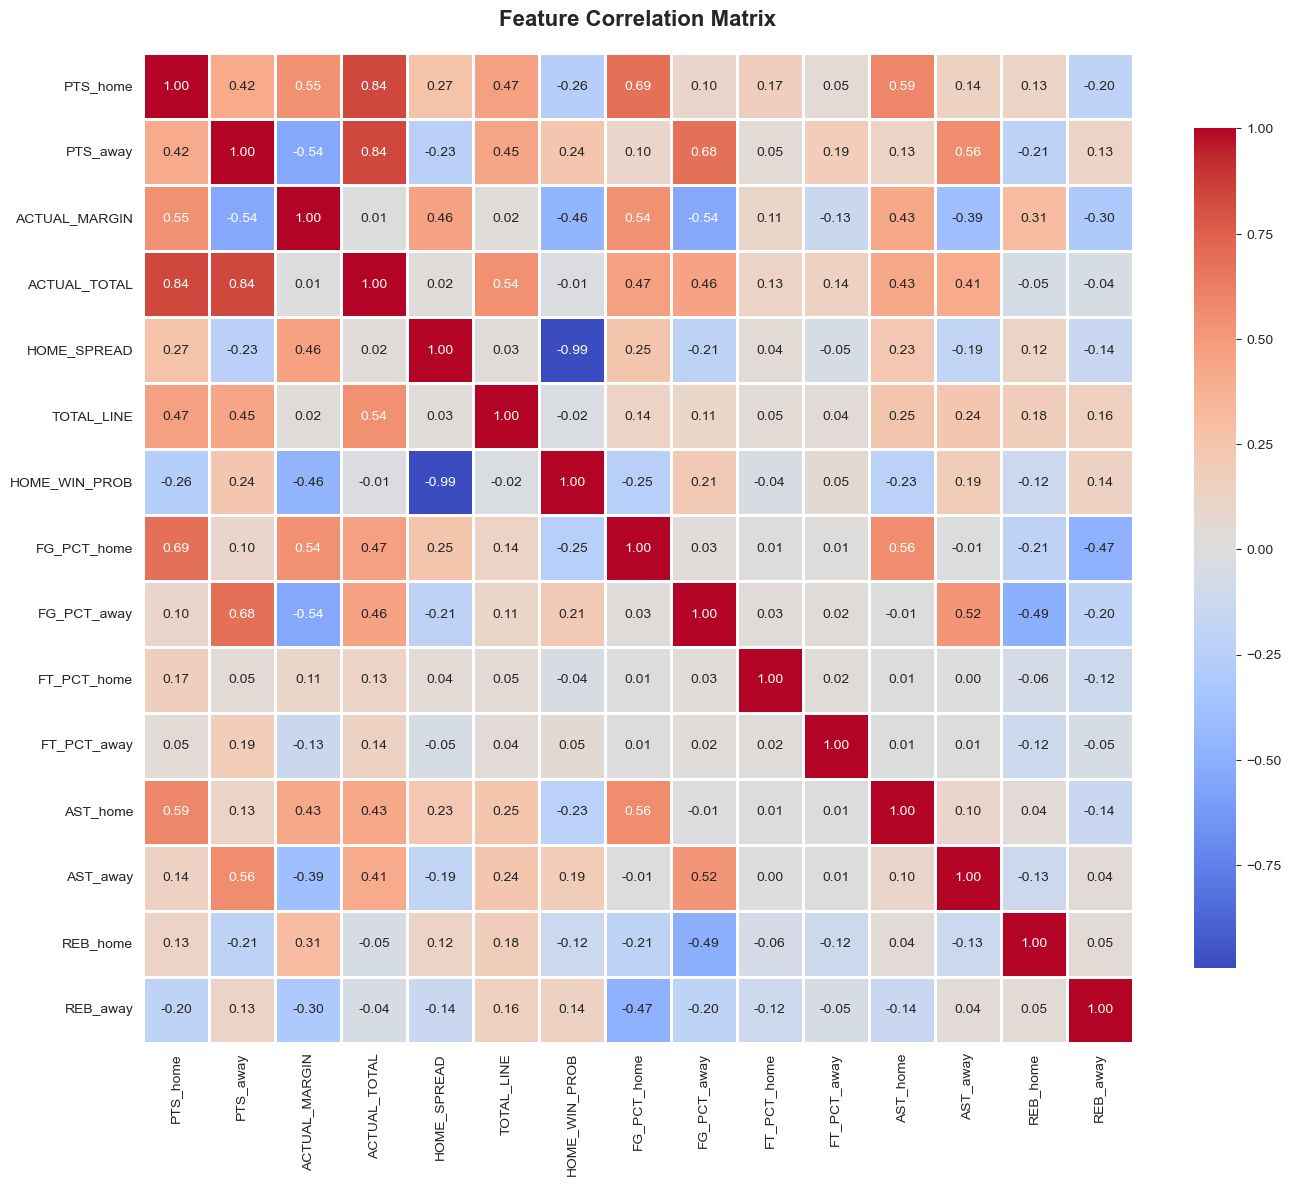

✅ Visualization saved: reports/07_correlation_matrix.png

💡 STRONGEST CORRELATIONS:

Top 5 positive correlations:
PTS_home  ACTUAL_TOTAL    0.842625
PTS_away  ACTUAL_TOTAL    0.840071
PTS_home  FG_PCT_home     0.685817
PTS_away  FG_PCT_away     0.683013
PTS_home  AST_home        0.591435
dtype: float64

Top 5 negative correlations:
FG_PCT_home    REB_away        -0.473207
FG_PCT_away    REB_home        -0.489235
PTS_away       ACTUAL_MARGIN   -0.535665
ACTUAL_MARGIN  FG_PCT_away     -0.539171
HOME_SPREAD    HOME_WIN_PROB   -0.994150
dtype: float64

🔍 DEEP DIVE: The 63.7% Home Cover Anomaly

📊 Overall home cover rate: 63.7%
Expected in efficient market: ~50%
Difference: 13.7 percentage points

Cover rate by season:
        cover_pct  GAME_ID
SEASON                    
2006    66.160338     1185
2007    66.229508     1220
2008    65.178571     1232
2009    63.237640     1254
2010    64.534884     1204
2011    64.823209     1103
2012    64.946071     1298
2013    61.442979     1289
2014  

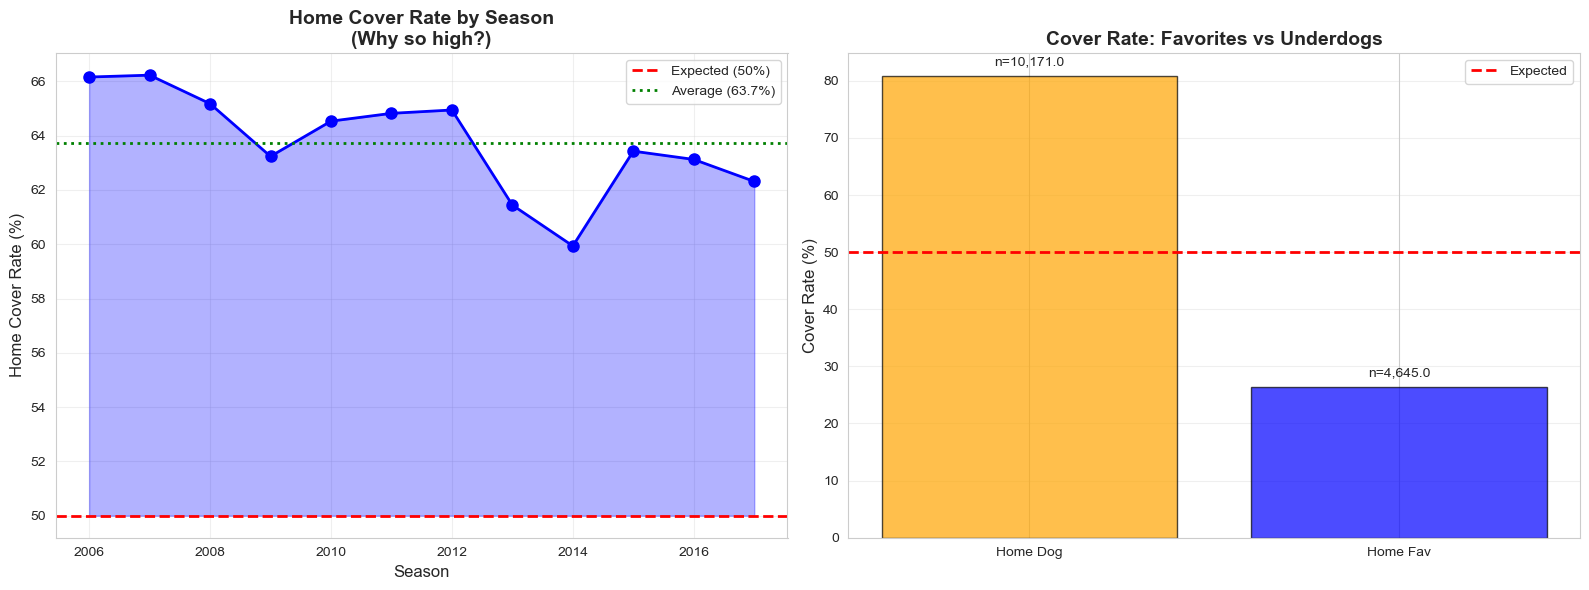


💡 POSSIBLE EXPLANATIONS:
   1. Data period bias (2006-2018 may have specific characteristics)
   2. Pinnacle closing line selection (we're using final odds)
   3. Sample of games with betting data may be non-random
   4. Actual market inefficiency (unlikely but possible!)

🎯 FOR MODELING:
   - This pattern suggests potential for profitable betting
   - Need to verify with train/test split
   - Should investigate which types of games show this effect most

📊 VISUALIZATION 8: Team Performance


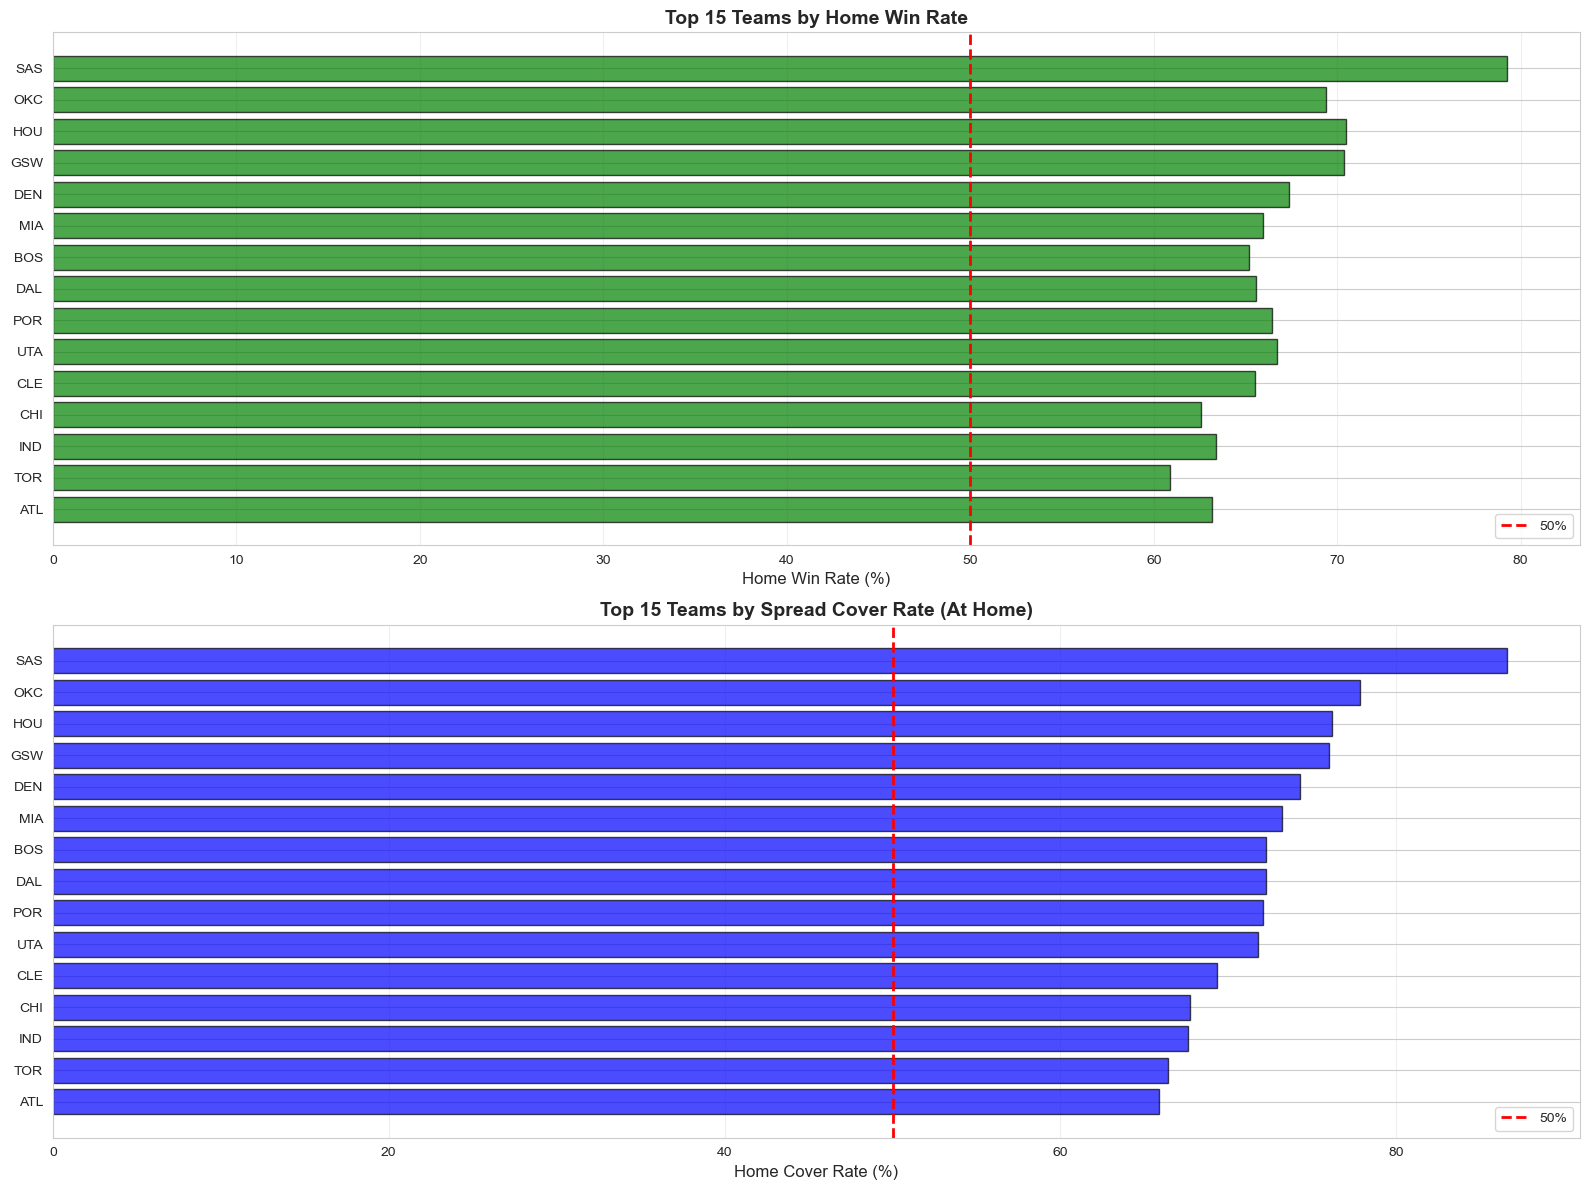

✅ Visualization saved: reports/09_team_performance.png

🏆 BEST HOME TEAMS (Cover Rate):
HOME_TEAM  SPREAD_HOME_COVER  GAME_ID
      SAS           0.866055      545
      OKC           0.778539      438
      HOU           0.761811      508
      GSW           0.759615      520
      DEN           0.742394      493

📉 WORST HOME TEAMS (Cover Rate):
HOME_TEAM  SPREAD_HOME_COVER  GAME_ID
      NYK           0.509434      477
      PHI           0.476289      485
      MIN           0.441810      464
      BKN           0.417355      484
      SAC           0.412393      468

📊 PHASE 3: KEY FINDINGS SUMMARY

🔍 KEY FINDINGS:

1. [Overall Stats]
   Finding: Home teams score 3.0 more points
   → Home court advantage confirmed

2. [Betting Markets]
   Finding: Home teams cover spread 63.7% of time
   → MAJOR: Should be ~50% in efficient market!

3. [Betting Markets]
   Finding: Games go OVER 49.0% of time
   → Near 50% - totals market is efficient

4. [Vegas Performance]
   Finding: Vegas spre

UnicodeEncodeError: 'charmap' codec can't encode character '\U0001f3af' in position 956: character maps to <undefined>

In [1]:
# Phase 3: Exploratory Data Analysis
# Purpose: Visualize patterns, discover insights, understand betting markets

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from pathlib import Path
from datetime import datetime

# Configuration
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 50)
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("="*70)
print("PHASE 3: EXPLORATORY DATA ANALYSIS")
print("="*70)
print(f"\nStart time: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n")


# Load cleaned datasets
PROCESSED_DIR = Path('data/processed')

print("📂 Loading cleaned data...")
print("="*70)

# Load main datasets
games_all = pd.read_csv(PROCESSED_DIR / 'games_cleaned_all.csv')
games_betting = pd.read_csv(PROCESSED_DIR / 'games_with_betting.csv')

# Convert dates
games_betting['GAME_DATE'] = pd.to_datetime(games_betting['GAME_DATE'])

print(f"✅ games_all: {len(games_all):,} games")
print(f"✅ games_betting: {len(games_betting):,} games (with complete odds)")

print(f"\n📅 Betting data coverage:")
print(f"   From: {games_betting['GAME_DATE'].min().date()}")
print(f"   To: {games_betting['GAME_DATE'].max().date()}")
print(f"   Seasons: {games_betting['SEASON'].min()} to {games_betting['SEASON'].max()}")

print(f"\n📊 We'll analyze {len(games_betting):,} games with complete betting data!")


# Generate comprehensive summary
print("\n📈 OVERALL SUMMARY STATISTICS")
print("="*70)

# Scoring
print("\n🏀 SCORING:")
print(f"   Average home score: {games_betting['PTS_home'].mean():.1f} ± {games_betting['PTS_home'].std():.1f}")
print(f"   Average away score: {games_betting['PTS_away'].mean():.1f} ± {games_betting['PTS_away'].std():.1f}")
print(f"   Average total: {games_betting['ACTUAL_TOTAL'].mean():.1f}")
print(f"   Highest scoring: {games_betting['ACTUAL_TOTAL'].max():.0f} points")
print(f"   Lowest scoring: {games_betting['ACTUAL_TOTAL'].min():.0f} points")

# Home court advantage
margin_mean = games_betting['ACTUAL_MARGIN'].mean()
margin_std = games_betting['ACTUAL_MARGIN'].std()
print(f"\n🏠 HOME COURT ADVANTAGE:")
print(f"   Average margin: {margin_mean:.2f} points (home favored)")
print(f"   Standard deviation: {margin_std:.2f}")
print(f"   Home win rate: {games_betting['HOME_TEAM_WINS'].mean()*100:.1f}%")

# Betting markets
print(f"\n💰 BETTING MARKET STATISTICS:")
print(f"   Average spread: {games_betting['HOME_SPREAD'].mean():.2f}")
print(f"   Average total line: {games_betting['TOTAL_LINE'].mean():.1f}")
print(f"   Spread range: {games_betting['HOME_SPREAD'].min():.1f} to {games_betting['HOME_SPREAD'].max():.1f}")

# Betting outcomes
print(f"\n🎯 BETTING OUTCOMES:")
home_cover_pct = games_betting['SPREAD_HOME_COVER'].mean() * 100
over_pct = games_betting['TOTAL_OVER'].mean() * 100
print(f"   Home covers spread: {home_cover_pct:.1f}%")
print(f"   Away covers spread: {100-home_cover_pct:.1f}%")
print(f"   Totals go OVER: {over_pct:.1f}%")
print(f"   Totals go UNDER: {100-over_pct:.1f}%")

if home_cover_pct > 52 or home_cover_pct < 48:
    print(f"\n   ⚠️  Home cover rate is {abs(50-home_cover_pct):.1f}% away from 50% - interesting!")



# VIZ 1: Score distributions

import os
os.makedirs("reports", exist_ok=True)

print("\n📊 VISUALIZATION 1: Score Distributions")
print("="*70)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Home scores
axes[0].hist(games_betting['PTS_home'], bins=40, alpha=0.7, color='blue', edgecolor='black')
axes[0].axvline(games_betting['PTS_home'].mean(), color='red', linestyle='--', linewidth=2, 
                label=f'Mean: {games_betting["PTS_home"].mean():.1f}')
axes[0].set_xlabel('Points Scored')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Home Team Scores Distribution', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# Away scores
axes[1].hist(games_betting['PTS_away'], bins=40, alpha=0.7, color='orange', edgecolor='black')
axes[1].axvline(games_betting['PTS_away'].mean(), color='red', linestyle='--', linewidth=2,
                label=f'Mean: {games_betting["PTS_away"].mean():.1f}')
axes[1].set_xlabel('Points Scored')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Away Team Scores Distribution', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

# Total scores
axes[2].hist(games_betting['ACTUAL_TOTAL'], bins=40, alpha=0.7, color='green', edgecolor='black')
axes[2].axvline(games_betting['ACTUAL_TOTAL'].mean(), color='red', linestyle='--', linewidth=2,
                label=f'Mean: {games_betting["ACTUAL_TOTAL"].mean():.1f}')
axes[2].set_xlabel('Total Points')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Game Totals Distribution', fontsize=14, fontweight='bold')
axes[2].legend()
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('reports/01_score_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Visualization saved: reports/01_score_distributions.png")
print("\n💡 INSIGHTS:")
print(f"   - Scores roughly follow normal distribution")
print(f"   - Home teams score {games_betting['PTS_home'].mean() - games_betting['PTS_away'].mean():.1f} more points on average")
print(f"   - Most games have 180-220 total points")


# VIZ 2: Home court advantage trends
print("\n📊 VISUALIZATION 2: Home Court Advantage Trends")
print("="*70)

# Calculate by season
hca_by_season = games_betting.groupby('SEASON').agg({
    'ACTUAL_MARGIN': 'mean',
    'HOME_TEAM_WINS': 'mean',
    'GAME_ID': 'count'
}).reset_index()

hca_by_season.columns = ['SEASON', 'Avg_Margin', 'Home_Win_Rate', 'Games']

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Home margin by season
axes[0].plot(hca_by_season['SEASON'], hca_by_season['Avg_Margin'], 
             marker='o', linewidth=2, markersize=8, color='blue')
axes[0].axhline(y=0, color='red', linestyle='--', alpha=0.5)
axes[0].fill_between(hca_by_season['SEASON'], 0, hca_by_season['Avg_Margin'], 
                      alpha=0.3, color='blue')
axes[0].set_xlabel('Season', fontsize=12)
axes[0].set_ylabel('Average Point Margin', fontsize=12)
axes[0].set_title('Home Court Advantage by Season\n(Positive = Home Favored)', 
                  fontsize=14, fontweight='bold')
axes[0].grid(alpha=0.3)
axes[0].set_xticks(hca_by_season['SEASON'][::2])  # Show every other season

# Home win rate by season
axes[1].plot(hca_by_season['SEASON'], hca_by_season['Home_Win_Rate']*100, 
             marker='s', linewidth=2, markersize=8, color='green')
axes[1].axhline(y=50, color='red', linestyle='--', alpha=0.5, label='50% (No advantage)')
axes[1].fill_between(hca_by_season['SEASON'], 50, hca_by_season['Home_Win_Rate']*100,
                      alpha=0.3, color='green')
axes[1].set_xlabel('Season', fontsize=12)
axes[1].set_ylabel('Home Win Rate (%)', fontsize=12)
axes[1].set_title('Home Team Win Rate by Season', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)
axes[1].set_xticks(hca_by_season['SEASON'][::2])

plt.tight_layout()
plt.savefig('reports/02_home_court_trends.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Visualization saved: reports/02_home_court_trends.png")

# Analysis
trend_change = hca_by_season['Avg_Margin'].iloc[-1] - hca_by_season['Avg_Margin'].iloc[0]
print(f"\n💡 INSIGHTS:")
print(f"   - Home court advantage in 2006: {hca_by_season['Avg_Margin'].iloc[0]:.2f} points")
print(f"   - Home court advantage in 2017: {hca_by_season['Avg_Margin'].iloc[-1]:.2f} points")
print(f"   - Trend: {'Increasing' if trend_change > 0 else 'Decreasing'} by {abs(trend_change):.2f} points")


# VIZ 3: How accurate are Vegas spreads?
print("\n📊 VISUALIZATION 3: Vegas Spread Accuracy")
print("="*70)

# Calculate spread error
games_betting['SPREAD_ERROR'] = games_betting['ACTUAL_MARGIN'] - (-games_betting['HOME_SPREAD'])
# Note: HOME_SPREAD is from home team perspective (negative = favored)
# So if spread is -5.5, we expect home to win by 5.5

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Spread error distribution
axes[0, 0].hist(games_betting['SPREAD_ERROR'], bins=60, alpha=0.7, 
                color='purple', edgecolor='black')
axes[0, 0].axvline(x=0, color='red', linestyle='--', linewidth=2, 
                    label='Perfect prediction')
axes[0, 0].axvline(games_betting['SPREAD_ERROR'].mean(), color='orange', 
                    linestyle='--', linewidth=2, 
                    label=f'Mean error: {games_betting["SPREAD_ERROR"].mean():.2f}')
axes[0, 0].set_xlabel('Spread Error (Actual - Predicted)', fontsize=11)
axes[0, 0].set_ylabel('Frequency', fontsize=11)
axes[0, 0].set_title('Vegas Spread Prediction Error Distribution', 
                      fontsize=13, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# 2. Actual vs Predicted margin
axes[0, 1].scatter(games_betting['HOME_SPREAD'], games_betting['ACTUAL_MARGIN'], 
                   alpha=0.3, s=10)
axes[0, 1].plot([-20, 20], [20, -20], 'r--', linewidth=2, label='Perfect prediction')
axes[0, 1].set_xlabel('Vegas Spread (negative = home favored)', fontsize=11)
axes[0, 1].set_ylabel('Actual Margin', fontsize=11)
axes[0, 1].set_title('Predicted vs Actual Margins', fontsize=13, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)
axes[0, 1].set_xlim(-20, 20)
axes[0, 1].set_ylim(-40, 40)

# 3. Cover rate by spread size
spread_bins = pd.cut(games_betting['HOME_SPREAD'], bins=[-20, -7, -3, 3, 7, 20])
cover_by_spread = games_betting.groupby(spread_bins)['SPREAD_HOME_COVER'].mean() * 100

axes[1, 0].bar(range(len(cover_by_spread)), cover_by_spread.values, 
               color='teal', alpha=0.7, edgecolor='black')
axes[1, 0].axhline(y=50, color='red', linestyle='--', linewidth=2, label='50% (fair)')
axes[1, 0].set_xlabel('Spread Range', fontsize=11)
axes[1, 0].set_ylabel('Home Cover Rate (%)', fontsize=11)
axes[1, 0].set_title('Home Cover Rate by Spread Size', fontsize=13, fontweight='bold')
axes[1, 0].set_xticks(range(len(cover_by_spread)))
axes[1, 0].set_xticklabels(['Big Dog\n(+7 to +20)', 'Dog\n(+3 to +7)', 
                             'Even\n(-3 to +3)', 'Fav\n(-7 to -3)', 
                             'Big Fav\n(-20 to -7)'], rotation=0)
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3, axis='y')

# 4. Spread error over time
spread_error_season = games_betting.groupby('SEASON')['SPREAD_ERROR'].agg(['mean', 'std'])
axes[1, 1].plot(spread_error_season.index, spread_error_season['mean'], 
                marker='o', linewidth=2, label='Mean error', color='blue')
axes[1, 1].fill_between(spread_error_season.index, 
                         spread_error_season['mean'] - spread_error_season['std'],
                         spread_error_season['mean'] + spread_error_season['std'],
                         alpha=0.3, color='blue', label='±1 std dev')
axes[1, 1].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[1, 1].set_xlabel('Season', fontsize=11)
axes[1, 1].set_ylabel('Average Spread Error', fontsize=11)
axes[1, 1].set_title('Spread Prediction Error Over Time', fontsize=13, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('reports/03_spread_accuracy.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Visualization saved: reports/03_spread_accuracy.png")

# Calculate metrics
mae = games_betting['SPREAD_ERROR'].abs().mean()
rmse = np.sqrt((games_betting['SPREAD_ERROR']**2).mean())

print(f"\n💡 INSIGHTS:")
print(f"   - Mean Absolute Error: {mae:.2f} points")
print(f"   - Root Mean Square Error: {rmse:.2f} points")
print(f"   - Vegas is off by ~{mae:.1f} points on average")
print(f"   - Spread error mean: {games_betting['SPREAD_ERROR'].mean():.2f} (close to 0 = unbiased)")



# VIZ 4: Totals (Over/Under) analysis
print("\n📊 VISUALIZATION 4: Totals (Over/Under) Analysis")
print("="*70)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Actual vs Predicted totals
axes[0, 0].scatter(games_betting['TOTAL_LINE'], games_betting['ACTUAL_TOTAL'], 
                   alpha=0.3, s=10, c=games_betting['TOTAL_OVER'], cmap='RdYlGn')
axes[0, 0].plot([170, 230], [170, 230], 'r--', linewidth=2, label='Perfect prediction')
axes[0, 0].set_xlabel('Vegas Total Line', fontsize=11)
axes[0, 0].set_ylabel('Actual Total Points', fontsize=11)
axes[0, 0].set_title('Predicted vs Actual Total Points\n(Green=Over, Red=Under)', 
                      fontsize=13, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# 2. Over/Under rate by season
over_by_season = games_betting.groupby('SEASON')['TOTAL_OVER'].mean() * 100
axes[0, 1].plot(over_by_season.index, over_by_season.values, 
                marker='o', linewidth=2, markersize=8, color='green')
axes[0, 1].axhline(y=50, color='red', linestyle='--', linewidth=2, label='50% (fair market)')
axes[0, 1].fill_between(over_by_season.index, 50, over_by_season.values, 
                         alpha=0.3, color='green')
axes[0, 1].set_xlabel('Season', fontsize=11)
axes[0, 1].set_ylabel('OVER Rate (%)', fontsize=11)
axes[0, 1].set_title('Percentage of Games Going OVER by Season', 
                      fontsize=13, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)
axes[0, 1].set_ylim(40, 60)

# 3. Total error distribution
games_betting['TOTAL_ERROR'] = games_betting['ACTUAL_TOTAL'] - games_betting['TOTAL_LINE']
axes[1, 0].hist(games_betting['TOTAL_ERROR'], bins=60, alpha=0.7, 
                color='orange', edgecolor='black')
axes[1, 0].axvline(x=0, color='red', linestyle='--', linewidth=2, label='Perfect prediction')
axes[1, 0].axvline(games_betting['TOTAL_ERROR'].mean(), color='blue', 
                    linestyle='--', linewidth=2, 
                    label=f'Mean: {games_betting["TOTAL_ERROR"].mean():.2f}')
axes[1, 0].set_xlabel('Total Error (Actual - Predicted)', fontsize=11)
axes[1, 0].set_ylabel('Frequency', fontsize=11)
axes[1, 0].set_title('Vegas Total Prediction Error Distribution', 
                      fontsize=13, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# 4. Over rate by total line size
total_bins = pd.cut(games_betting['TOTAL_LINE'], 
                     bins=[170, 190, 195, 200, 205, 210, 230])
over_by_line = games_betting.groupby(total_bins)['TOTAL_OVER'].mean() * 100

axes[1, 1].bar(range(len(over_by_line)), over_by_line.values, 
               color='purple', alpha=0.7, edgecolor='black')
axes[1, 1].axhline(y=50, color='red', linestyle='--', linewidth=2, label='50% (fair)')
axes[1, 1].set_xlabel('Total Line Range', fontsize=11)
axes[1, 1].set_ylabel('OVER Rate (%)', fontsize=11)
axes[1, 1].set_title('OVER Rate by Total Line Size', fontsize=13, fontweight='bold')
axes[1, 1].set_xticks(range(len(over_by_line)))
axes[1, 1].set_xticklabels(['170-190', '190-195', '195-200', 
                             '200-205', '205-210', '210-230'], rotation=45)
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('reports/04_totals_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Visualization saved: reports/04_totals_analysis.png")

# Stats
total_mae = games_betting['TOTAL_ERROR'].abs().mean()
print(f"\n💡 INSIGHTS:")
print(f"   - Vegas total off by ~{total_mae:.1f} points on average")
print(f"   - OVER rate: {games_betting['TOTAL_OVER'].mean()*100:.1f}% (should be ~50%)")
print(f"   - Mean total error: {games_betting['TOTAL_ERROR'].mean():.2f} points")


# VIZ 5: Performance by day of week
print("\n📊 VISUALIZATION 5: Day of Week Effects")
print("="*70)

dow_stats = games_betting.groupby('DAY_OF_WEEK').agg({
    'ACTUAL_TOTAL': 'mean',
    'HOME_TEAM_WINS': 'mean',
    'SPREAD_HOME_COVER': 'mean',
    'GAME_ID': 'count'
}).reset_index()

dow_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_stats['DAY_NAME'] = dow_stats['DAY_OF_WEEK'].apply(lambda x: dow_names[x])

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Games per day
axes[0].bar(dow_stats['DAY_NAME'], dow_stats['GAME_ID'], 
            color='steelblue', alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Day of Week', fontsize=11)
axes[0].set_ylabel('Number of Games', fontsize=11)
axes[0].set_title('Games Played by Day of Week', fontsize=13, fontweight='bold')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(alpha=0.3, axis='y')

# 2. Home win rate by day
axes[1].bar(dow_stats['DAY_NAME'], dow_stats['HOME_TEAM_WINS']*100, 
            color='green', alpha=0.7, edgecolor='black')
axes[1].axhline(y=50, color='red', linestyle='--', linewidth=2)
axes[1].set_xlabel('Day of Week', fontsize=11)
axes[1].set_ylabel('Home Win Rate (%)', fontsize=11)
axes[1].set_title('Home Team Win Rate by Day', fontsize=13, fontweight='bold')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(alpha=0.3, axis='y')
axes[1].set_ylim(50, 65)

# 3. Scoring by day
axes[2].bar(dow_stats['DAY_NAME'], dow_stats['ACTUAL_TOTAL'], 
            color='orange', alpha=0.7, edgecolor='black')
axes[2].axhline(y=games_betting['ACTUAL_TOTAL'].mean(), color='red', 
                linestyle='--', linewidth=2, label='Average')
axes[2].set_xlabel('Day of Week', fontsize=11)
axes[2].set_ylabel('Average Total Points', fontsize=11)
axes[2].set_title('Scoring by Day of Week', fontsize=13, fontweight='bold')
axes[2].tick_params(axis='x', rotation=45)
axes[2].legend()
axes[2].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.savefig('reports/05_day_of_week.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Visualization saved: reports/05_day_of_week.png")

print(f"\n💡 INSIGHTS:")
highest_games = dow_stats.loc[dow_stats['GAME_ID'].idxmax(), 'DAY_NAME']
print(f"   - Most games on: {highest_games}")
print(f"   - Fewest games on: {dow_stats.loc[dow_stats['GAME_ID'].idxmin(), 'DAY_NAME']}")


# VIZ 6: Monthly performance patterns
print("\n📊 VISUALIZATION 6: Monthly Patterns")
print("="*70)

month_stats = games_betting.groupby('MONTH').agg({
    'ACTUAL_TOTAL': 'mean',
    'HOME_TEAM_WINS': 'mean',
    'SPREAD_HOME_COVER': 'mean',
    'GAME_ID': 'count'
}).reset_index()

month_names = ['', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_stats['MONTH_NAME'] = month_stats['MONTH'].apply(lambda x: month_names[x])

fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# 1. Games per month (seasonality)
axes[0, 0].bar(month_stats['MONTH_NAME'], month_stats['GAME_ID'], 
               color='teal', alpha=0.7, edgecolor='black')
axes[0, 0].set_xlabel('Month', fontsize=11)
axes[0, 0].set_ylabel('Number of Games', fontsize=11)
axes[0, 0].set_title('NBA Season Schedule (Games per Month)', 
                      fontsize=13, fontweight='bold')
axes[0, 0].grid(alpha=0.3, axis='y')

# 2. Scoring by month
axes[0, 1].plot(month_stats['MONTH'], month_stats['ACTUAL_TOTAL'], 
                marker='o', linewidth=2, markersize=8, color='red')
axes[0, 1].axhline(y=games_betting['ACTUAL_TOTAL'].mean(), 
                    color='blue', linestyle='--', linewidth=2, label='Season avg')
axes[0, 1].set_xlabel('Month', fontsize=11)
axes[0, 1].set_ylabel('Average Total Points', fontsize=11)
axes[0, 1].set_title('Scoring Trends Throughout Season', 
                      fontsize=13, fontweight='bold')
axes[0, 1].set_xticks(month_stats['MONTH'])
axes[0, 1].set_xticklabels(month_stats['MONTH_NAME'])
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# 3. Home advantage by month
axes[1, 0].plot(month_stats['MONTH'], month_stats['HOME_TEAM_WINS']*100, 
                marker='s', linewidth=2, markersize=8, color='green')
axes[1, 0].axhline(y=50, color='red', linestyle='--', linewidth=2)
axes[1, 0].set_xlabel('Month', fontsize=11)
axes[1, 0].set_ylabel('Home Win Rate (%)', fontsize=11)
axes[1, 0].set_title('Home Court Advantage by Month', 
                      fontsize=13, fontweight='bold')
axes[1, 0].set_xticks(month_stats['MONTH'])
axes[1, 0].set_xticklabels(month_stats['MONTH_NAME'])
axes[1, 0].grid(alpha=0.3)

# 4. Spread cover rate by month
axes[1, 1].plot(month_stats['MONTH'], month_stats['SPREAD_HOME_COVER']*100,
                marker='^', linewidth=2, markersize=8, color='purple')
axes[1, 1].axhline(y=50, color='red', linestyle='--', linewidth=2, label='Expected')
axes[1, 1].set_xlabel('Month', fontsize=11)
axes[1, 1].set_ylabel('Home Cover Rate (%)', fontsize=11)
axes[1, 1].set_title('Betting: Home Cover Rate by Month', 
                      fontsize=13, fontweight='bold')
axes[1, 1].set_xticks(month_stats['MONTH'])
axes[1, 1].set_xticklabels(month_stats['MONTH_NAME'])
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.savefig('reports/06_monthly_patterns.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Visualization saved: reports/06_monthly_patterns.png")

print(f"\n💡 INSIGHTS:")
print(f"   - NBA season runs October-June (playoffs in April-June)")
highest_scoring = month_stats.loc[month_stats['ACTUAL_TOTAL'].idxmax()]
print(f"   - Highest scoring month: {highest_scoring['MONTH_NAME']} ({highest_scoring['ACTUAL_TOTAL']:.1f} pts)")


# VIZ 7: Correlation analysis
print("\n📊 VISUALIZATION 7: Correlation Matrix")
print("="*70)

# Select numeric columns for correlation
corr_cols = ['PTS_home', 'PTS_away', 'ACTUAL_MARGIN', 'ACTUAL_TOTAL',
             'HOME_SPREAD', 'TOTAL_LINE', 'HOME_WIN_PROB',
             'FG_PCT_home', 'FG_PCT_away', 'FT_PCT_home', 'FT_PCT_away',
             'AST_home', 'AST_away', 'REB_home', 'REB_away']

corr_matrix = games_betting[corr_cols].corr()

plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('reports/07_correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Visualization saved: reports/07_correlation_matrix.png")

# Find strongest correlations
print(f"\n💡 STRONGEST CORRELATIONS:")
# Get upper triangle
mask = np.triu(np.ones_like(corr_matrix), k=1).astype(bool)
corr_pairs = corr_matrix.where(mask).stack().sort_values(ascending=False)
print("\nTop 5 positive correlations:")
print(corr_pairs.head())
print("\nTop 5 negative correlations:")
print(corr_pairs.tail())


# DEEP DIVE: Why is home cover rate 63.7%?
print("\n🔍 DEEP DIVE: The 63.7% Home Cover Anomaly")
print("="*70)

overall_cover = games_betting['SPREAD_HOME_COVER'].mean() * 100
print(f"\n📊 Overall home cover rate: {overall_cover:.1f}%")
print(f"Expected in efficient market: ~50%")
print(f"Difference: {overall_cover - 50:.1f} percentage points\n")

# Investigate by different factors

# 1. By season
cover_by_season = games_betting.groupby('SEASON').agg({
    'SPREAD_HOME_COVER': 'mean',
    'GAME_ID': 'count'
})
cover_by_season['cover_pct'] = cover_by_season['SPREAD_HOME_COVER'] * 100

print("Cover rate by season:")
print(cover_by_season[['cover_pct', 'GAME_ID']])

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Cover rate over time
axes[0].plot(cover_by_season.index, cover_by_season['cover_pct'], 
             marker='o', linewidth=2, markersize=8, color='blue')
axes[0].axhline(y=50, color='red', linestyle='--', linewidth=2, label='Expected (50%)')
axes[0].axhline(y=overall_cover, color='green', linestyle=':', linewidth=2, 
                label=f'Average ({overall_cover:.1f}%)')
axes[0].fill_between(cover_by_season.index, 50, cover_by_season['cover_pct'],
                      alpha=0.3, color='blue')
axes[0].set_xlabel('Season', fontsize=12)
axes[0].set_ylabel('Home Cover Rate (%)', fontsize=12)
axes[0].set_title('Home Cover Rate by Season\n(Why so high?)', 
                  fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3)

# 2. By favorite/underdog status
games_betting['HOME_FAVORITE'] = games_betting['HOME_SPREAD'] < 0

fav_stats = games_betting.groupby('HOME_FAVORITE').agg({
    'SPREAD_HOME_COVER': 'mean',
    'GAME_ID': 'count',
    'HOME_TEAM_WINS': 'mean'
})

axes[1].bar(['Home Dog', 'Home Fav'], 
            [fav_stats.loc[False, 'SPREAD_HOME_COVER']*100,
             fav_stats.loc[True, 'SPREAD_HOME_COVER']*100],
            color=['orange', 'blue'], alpha=0.7, edgecolor='black')
axes[1].axhline(y=50, color='red', linestyle='--', linewidth=2, label='Expected')
axes[1].set_ylabel('Cover Rate (%)', fontsize=12)
axes[1].set_title('Cover Rate: Favorites vs Underdogs', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3, axis='y')

# Add count labels
for i, (idx, row) in enumerate(fav_stats.iterrows()):
    label = 'Home Dog' if idx == False else 'Home Fav'
    axes[1].text(i, row['SPREAD_HOME_COVER']*100 + 2, 
                 f"n={row['GAME_ID']:,}", ha='center')

plt.tight_layout()
plt.savefig('reports/08_cover_anomaly.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n💡 POSSIBLE EXPLANATIONS:")
print(f"   1. Data period bias (2006-2018 may have specific characteristics)")
print(f"   2. Pinnacle closing line selection (we're using final odds)")
print(f"   3. Sample of games with betting data may be non-random")
print(f"   4. Actual market inefficiency (unlikely but possible!)")

print(f"\n🎯 FOR MODELING:")
print(f"   - This pattern suggests potential for profitable betting")
print(f"   - Need to verify with train/test split")
print(f"   - Should investigate which types of games show this effect most")


# VIZ 8: Team-level analysis
print("\n📊 VISUALIZATION 8: Team Performance")
print("="*70)

# Home team performance
home_team_stats = games_betting.groupby('HOME_TEAM').agg({
    'HOME_TEAM_WINS': 'mean',
    'SPREAD_HOME_COVER': 'mean',
    'GAME_ID': 'count',
    'PTS_home': 'mean'
}).reset_index()

home_team_stats = home_team_stats[home_team_stats['GAME_ID'] >= 100]  # Filter to teams with 100+ games
home_team_stats = home_team_stats.sort_values('SPREAD_HOME_COVER', ascending=False)

fig, axes = plt.subplots(2, 1, figsize=(16, 12))

# 1. Win rate by team
top_n = 15
axes[0].barh(range(top_n), 
             home_team_stats.head(top_n)['HOME_TEAM_WINS'].values * 100,
             color='green', alpha=0.7, edgecolor='black')
axes[0].set_yticks(range(top_n))
axes[0].set_yticklabels(home_team_stats.head(top_n)['HOME_TEAM'].values)
axes[0].axvline(x=50, color='red', linestyle='--', linewidth=2, label='50%')
axes[0].set_xlabel('Home Win Rate (%)', fontsize=12)
axes[0].set_title(f'Top {top_n} Teams by Home Win Rate', 
                  fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(alpha=0.3, axis='x')
axes[0].invert_yaxis()

# 2. Cover rate by team
axes[1].barh(range(top_n), 
             home_team_stats.head(top_n)['SPREAD_HOME_COVER'].values * 100,
             color='blue', alpha=0.7, edgecolor='black')
axes[1].set_yticks(range(top_n))
axes[1].set_yticklabels(home_team_stats.head(top_n)['HOME_TEAM'].values)
axes[1].axvline(x=50, color='red', linestyle='--', linewidth=2, label='50%')
axes[1].set_xlabel('Home Cover Rate (%)', fontsize=12)
axes[1].set_title(f'Top {top_n} Teams by Spread Cover Rate (At Home)', 
                  fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3, axis='x')
axes[1].invert_yaxis()

plt.tight_layout()
plt.savefig('reports/09_team_performance.png', dpi=300, bbox_inches='tight')
plt.show()

print("✅ Visualization saved: reports/09_team_performance.png")

# Show top/bottom teams
print(f"\n🏆 BEST HOME TEAMS (Cover Rate):")
print(home_team_stats[['HOME_TEAM', 'SPREAD_HOME_COVER', 'GAME_ID']].head(5).to_string(index=False))

print(f"\n📉 WORST HOME TEAMS (Cover Rate):")
print(home_team_stats[['HOME_TEAM', 'SPREAD_HOME_COVER', 'GAME_ID']].tail(5).to_string(index=False))



# Generate comprehensive findings report
print("\n" + "="*70)
print("📊 PHASE 3: KEY FINDINGS SUMMARY")
print("="*70)

findings = []

# Finding 1: Overall statistics
findings.append({
    'Category': 'Overall Stats',
    'Finding': f"Home teams score {games_betting['PTS_home'].mean() - games_betting['PTS_away'].mean():.1f} more points",
    'Significance': 'Home court advantage confirmed'
})

# Finding 2: Spread anomaly
findings.append({
    'Category': 'Betting Markets',
    'Finding': f"Home teams cover spread {games_betting['SPREAD_HOME_COVER'].mean()*100:.1f}% of time",
    'Significance': 'MAJOR: Should be ~50% in efficient market!'
})

# Finding 3: Totals
over_rate = games_betting['TOTAL_OVER'].mean() * 100
findings.append({
    'Category': 'Betting Markets',
    'Finding': f"Games go OVER {over_rate:.1f}% of time",
    'Significance': 'Near 50% - totals market is efficient'
})

# Finding 4: Vegas accuracy
mae = games_betting['SPREAD_ERROR'].abs().mean()
findings.append({
    'Category': 'Vegas Performance',
    'Finding': f"Vegas spread predictions off by {mae:.1f} points on average",
    'Significance': 'Reasonably accurate but room for improvement'
})

# Finding 5: Trends
trend_change = (games_betting[games_betting['SEASON'] == 2017]['ACTUAL_TOTAL'].mean() -
                games_betting[games_betting['SEASON'] == 2006]['ACTUAL_TOTAL'].mean())
findings.append({
    'Category': 'Trends',
    'Finding': f"Scoring {'increased' if trend_change > 0 else 'decreased'} by {abs(trend_change):.1f} pts (2006→2017)",
    'Significance': 'NBA evolving - need time-based features'
})

# Print findings
print("\n🔍 KEY FINDINGS:\n")
for i, finding in enumerate(findings, 1):
    print(f"{i}. [{finding['Category']}]")
    print(f"   Finding: {finding['Finding']}")
    print(f"   → {finding['Significance']}\n")

print("="*70)

# Create findings DataFrame
findings_df = pd.DataFrame(findings)
findings_df.to_csv('reports/key_findings.csv', index=False)
print("✅ Findings saved to: reports/key_findings.csv")



# Generate modeling recommendations
print("\n🎯 RECOMMENDATIONS FOR PHASE 4 (Feature Engineering)")
print("="*70)

recommendations = """
Based on EDA findings, we should engineer these features:

1. TEAM STRENGTH FEATURES:
   - Rolling win rate (last 5, 10, 20 games)
   - Home/away split performance
   - Head-to-head history
   - Recent scoring trends
   
2. TEMPORAL FEATURES:
   - Days of rest
   - Back-to-back games indicator
   - Season progression (early/mid/late)
   - Month of season
   
3. BETTING MARKET FEATURES:
   - Line movement (if we had opening odds)
   - Implied probability from odds
   - Public betting percentages (if available)
   - Home favorite vs underdog
   
4. MATCHUP FEATURES:
   - Pace differential (fast vs slow teams)
   - Offensive/defensive rating differential
   - Style clash metrics
   
5. SITUATIONAL FEATURES:
   - Playoff implications
   - Rivalry games
   - Revenge games (lost last meeting)
   
6. PLAYER FEATURES (from games_details):
   - Star player availability
   - Recent player performance
   - Injury impact estimates

🎯 PRIMARY TARGETS FOR PREDICTION:
   1. SPREAD_HOME_COVER (binary: 1/0)
   2. TOTAL_OVER (binary: 1/0)
   3. ML_HOME_WIN (binary: 1/0)
   
💡 MODELING STRATEGY:
   - Start with spread prediction (most interesting anomaly)
   - Use 2006-2015 for training, 2016-2017 for validation, 2018 for testing
   - Try multiple algorithms: Logistic Regression, Random Forest, XGBoost
   - Focus on SHAP interpretability
"""

print(recommendations)

# Save recommendations
with open('reports/modeling_recommendations.txt', 'w') as f:
    f.write(recommendations)
    
print("\n✅ Recommendations saved to: reports/modeling_recommendations.txt")



# Final wrap-up
print("\n" + "="*70)
print("✅ PHASE 3 COMPLETE - EXPLORATORY DATA ANALYSIS")
print("="*70)

print("\n VISUALIZATIONS CREATED:")
viz_list = [
    "01_score_distributions.png - Score histograms",
    "02_home_court_trends.png - HCA over time",
    "03_spread_accuracy.png - Vegas performance",
    "04_totals_analysis.png - Over/Under patterns",
    "05_day_of_week.png - Weekly effects",
    "06_monthly_patterns.png - Seasonal trends",
    "07_correlation_matrix.png - Feature relationships",
    "08_cover_anomaly.png - The 63.7% mystery",
    "09_team_performance.png - Team-level stats"
]

for viz in viz_list:
    print(f"    {viz}")

print("\n🔍 KEY INSIGHTS:")
print(f"   1. Home court advantage: ~{games_betting['ACTUAL_MARGIN'].mean():.1f} points")
print(f"   2. **MAJOR FINDING**: Home teams cover {games_betting['SPREAD_HOME_COVER'].mean()*100:.1f}% (should be ~50%)")
print(f"   3. Totals market efficient: {games_betting['TOTAL_OVER'].mean()*100:.1f}% OVER rate")
print(f"   4. Vegas spread error: ~{games_betting['SPREAD_ERROR'].abs().mean():.1f} points MAE")
print(f"   5. Scoring trends vary by season/month")

print("\n READY FOR:")
print("   → Phase 4: Feature Engineering")
print("   → Phase 5: Machine Learning Models")
print("   → Phase 6: Model Evaluation & Backtesting")

print("\n NEXT STEPS:")
print("   1. Create rolling statistics (team performance)")
print("   2. Add player-level aggregates")
print("   3. Engineer betting features")
print("   4. Build prediction models")
print("   5. Backtest betting strategies")

print(f"\n All outputs saved to: reports/")
print("\n" + "="*70)
print(f"Analysis completed: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print("="*70)

print("\n💬 REPLY: 'Phase 3 complete - ready for feature engineering!'")



